# Sociology of Art Students' Practices

**Authors:** Solène Gros, Eloïse Delerue

**Date:** June 9th, 2024

## 1. Library Import

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf

## 2. Data Import

In [99]:
df = pd.read_csv("Art practices among art students_clean.csv")
pd.set_option('display.max_columns', None)

## 3. Data Manipulation

In [100]:
remplacement_1 = {"Pas du tout confortable":1, "Peu confortable":2, "Moyennement confortable":3, "Assez confortable":4, "Très confortable":5}
df["Q14"] = df["Q14"].replace(remplacement_1)

remplacement_2 = {"En zone rurale (campagne, village, zone agricole)":1, "En zone moyennement urbanisée (banlieue, moyenne ville)":2, "En zone très urbanisée (centre-ville, quartier résidentiel en ville)":3}
df["Q9"] = df["Q9"].replace(remplacement_2)
df["Q10"] = df["Q10"].replace(remplacement_2)

remplacement_3 = {"Pas de diplôme":0, "Brevet des collèges":0, "CAP/BEP":1, "Baccalauréat (ou équivalent à l'étranger)":2, "BTS/DUT (bac+2)":3, "License (bac+3)":4, "Master (bac+5)":5, "Doctorat":6, "Autre (diplôme absent de la liste, parent absent...)":None}
df["Q11"] = df["Q11"].replace(remplacement_3)
df["Q12"] = df["Q12"].replace(remplacement_3)

remplacement_4 = {"Non":0, "Oui un parent":1, "Oui les deux":2}
df["Q13"] = df["Q13"].replace(remplacement_4)

remplacement_5 = {"Moins d'une fois par an":1, "Environ une fois par an":2, "Plusieurs fois par an":3, "Environ une fois par mois":4, "Toutes les semaines":5}
for i in range(1, 6):
    df[f"Q15_{i}"] = df[f"Q15_{i}"].replace(remplacement_5)

remplacement_6 = {"Jamais":1, "Rarement":2, "Parfois":3, "Souvent":4, "Très souvent":5}
df["Q17"] = df["Q17"].replace(remplacement_6)
for i in range(1, 15):
    df[f"Q19_{i}"] = df[f"Q19_{i}"].replace(remplacement_6)

In [101]:
df["Parents"] = df.apply(lambda row: max(row['Q11'], row['Q12']), axis=1)

In [102]:
def coef_culture(data):
    elitiste = data[["Q15_1", "Q15_5"]].mean()
    autre = data[["Q15_2", "Q15_3", "Q15_4"]].mean()
    return np.log(elitiste/autre) / np.log(5)

df["culture"] = df.apply(coef_culture, axis=1)

In [103]:
def coef_art(data):
    elitiste = data[["Q19_3", "Q19_6", "Q19_7", "Q19_11", "Q19_13"]].mean()
    autre = data[["Q19_1", "Q19_2", "Q19_4", "Q19_5", "Q19_8", "Q19_9", "Q19_10", "Q19_12"]].mean()
    return np.log(elitiste/autre) / np.log(5)

df["art"] = df.apply(coef_art, axis=1)

## 4. Data Description

c:\Users\elois\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\elois\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\elois\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\elois\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

Text(0.5, 1.0, 'd)')

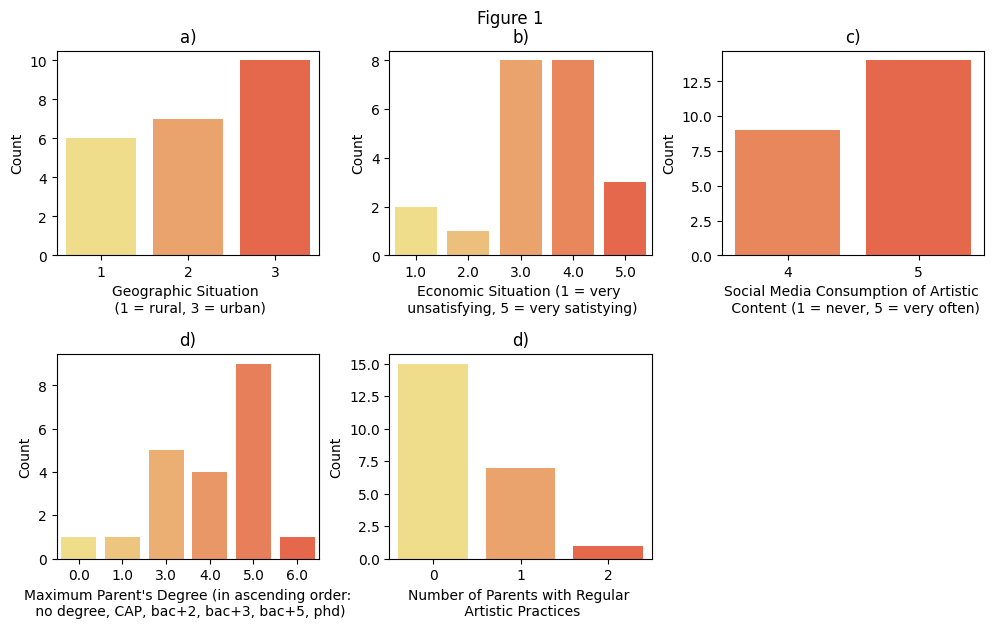

In [104]:
palette = sns.color_palette(["#FFE77C", "#FFC36A", "#FFA058", "#FF7C45", "#FF5833"])
palette_moins = sns.color_palette(["#FFC36A", "#FFA058", "#FF7C45", "#FF5833"])
palette_encore_moins = sns.color_palette(["#FF7C45", "#FF5833"])
palette_3 = sns.color_palette(["#FFE77C", "#FFA058", "#FF5833"])
palette_6 = sns.color_palette(["#FFE77C", "#FFCA6D", "#FFAE5F", "#FF9150", "#FF7542", "#FF5833"])

fig1, ax1 = plt.subplots(2,3)
plt.suptitle("Figure 1")
fig1.set_figheight(6)
fig1.set_figwidth(10)
fig1.tight_layout(w_pad=2, h_pad=5)
ax1[1][2].set_visible(False)

sns.countplot(x=df["Q10"], palette=palette_3, ax=ax1[0][0])
ax1[0][0].set(xlabel = 'Geographic Situation \n (1 = rural, 3 = urban)', ylabel = 'Count')
ax1[0][0].set_title('a)')

sns.countplot(x=df["Q14"], palette=palette, ax=ax1[0][1])
ax1[0][1].set(xlabel = 'Economic Situation (1 = very \n unsatisfying, 5 = very satistying)', ylabel = 'Count')
ax1[0][1].set_title('b)')

sns.countplot(x=df["Q17"], palette=palette_encore_moins, ax=ax1[0][2])
ax1[0][2].set(xlabel = "Social Media Consumption of Artistic \n Content (1 = never, 5 = very often)", ylabel = 'Count')
ax1[0][2].set_title('c)')

sns.countplot(x=df["Parents"], palette=palette_6, ax=ax1[1][0])
ax1[1][0].set(xlabel = "Maximum Parent's Degree (in ascending order:\n no degree, CAP, bac+2, bac+3, bac+5, phd)", ylabel = 'Count')
ax1[1][0].set_title('d)')

sns.countplot(x=df["Q13"], palette=palette_3, ax=ax1[1][1])
ax1[1][1].set(xlabel = "Number of Parents with Regular \n Artistic Practices", ylabel = 'Count')
ax1[1][1].set_title('d)')

c:\Users\elois\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\elois\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\elois\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\elois\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

[Text(0.5, 14.722222222222216, 'Opera'),
 Text(201.83986928104576, 0.5, 'Count')]

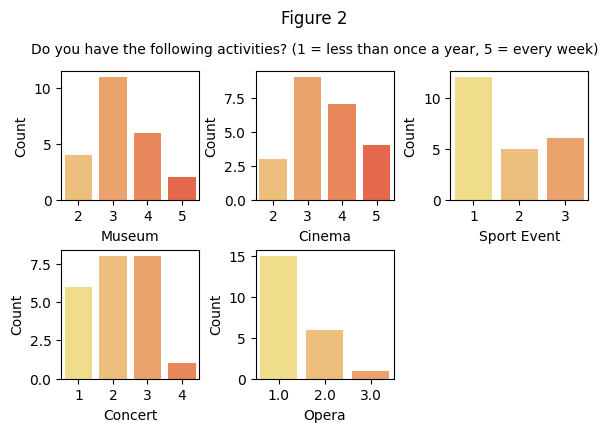

In [105]:
palette = sns.color_palette(["#FFE77C", "#FFC36A", "#FFA058", "#FF7C45", "#FF5833"])
palette_moins = sns.color_palette(["#FFC36A", "#FFA058", "#FF7C45", "#FF5833"])

fig2, ax2 = plt.subplots(2, 3)
plt.suptitle("Figure 2", y=1.02)
fig2.text(0.5, 0.91, "Do you have the following activities? (1 = less than once a year, 5 = every week)", ha='center', fontsize=10)


fig2.set_figheight(4)
fig2.set_figwidth(6)
fig2.tight_layout(w_pad=1, h_pad=1.5)


ax2[1][2].set_visible(False)


sns.countplot(x=df["Q15_1"], palette=palette_moins, ax=ax2[0][0])
ax2[0][0].set(xlabel = 'Museum', ylabel = 'Count')

sns.countplot(x=df["Q15_2"], palette=palette_moins, ax=ax2[0][1])
ax2[0][1].set(xlabel = 'Cinema', ylabel = 'Count')

sns.countplot(x=df["Q15_3"], palette=palette, ax=ax2[0][2])
ax2[0][2].set(xlabel = 'Sport Event', ylabel = 'Count')

sns.countplot(x=df["Q15_4"], palette=palette, ax=ax2[1][0])
ax2[1][0].set(xlabel = 'Concert', ylabel = 'Count')

sns.countplot(x=df["Q15_5"], palette=palette, ax=ax2[1][1])
ax2[1][1].set(xlabel = 'Opera', ylabel = 'Count')


c:\Users\elois\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\elois\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\elois\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\elois\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

[Text(0.5, 25.722222222222214, 'Cinema'),
 Text(310.5239463601533, 0.5, 'Count')]

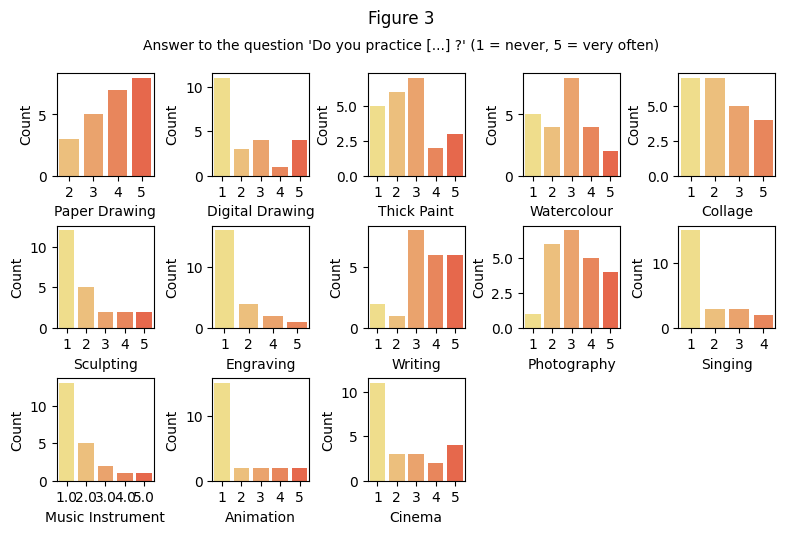

In [106]:
fig3, ax3 = plt.subplots(3, 5)
plt.suptitle("Figure 3", y=1.02)
fig3.text(0.5, 0.94, "Answer to the question 'Do you practice [...] ?' (1 = never, 5 = very often)", ha='center', fontsize=10)


fig3.set_figheight(5)
fig3.set_figwidth(8)
fig3.tight_layout(w_pad=0.5, h_pad=1.5)


ax3[2][3].set_visible(False)
ax3[2][4].set_visible(False)


sns.countplot(x=df["Q19_1"], palette=palette_moins, ax=ax3[0][0])
ax3[0][0].set(xlabel = 'Paper Drawing', ylabel = 'Count')
sns.countplot(x=df["Q19_2"], palette=palette, ax=ax3[0][1])
ax3[0][1].set(xlabel = 'Digital Drawing', ylabel = 'Count')
sns.countplot(x=df["Q19_3"], palette=palette, ax=ax3[0][2])
ax3[0][2].set(xlabel = 'Thick Paint', ylabel = 'Count')
sns.countplot(x=df["Q19_4"], palette=palette, ax=ax3[0][3])
ax3[0][3].set(xlabel = 'Watercolour', ylabel = 'Count')
sns.countplot(x=df["Q19_5"], palette=palette, ax=ax3[0][4])
ax3[0][4].set(xlabel = 'Collage', ylabel = 'Count')
sns.countplot(x=df["Q19_6"], palette=palette, ax=ax3[1][0])
ax3[1][0].set(xlabel = 'Sculpting', ylabel = 'Count')
sns.countplot(x=df["Q19_7"], palette=palette, ax=ax3[1][1])
ax3[1][1].set(xlabel = 'Engraving', ylabel = 'Count')
sns.countplot(x=df["Q19_8"], palette=palette, ax=ax3[1][2])
ax3[1][2].set(xlabel = 'Writing', ylabel = 'Count')
sns.countplot(x=df["Q19_9"], palette=palette, ax=ax3[1][3])
ax3[1][3].set(xlabel = 'Photography', ylabel = 'Count')
sns.countplot(x=df["Q19_10"], palette=palette, ax=ax3[1][4])
ax3[1][4].set(xlabel = 'Singing', ylabel = 'Count')
sns.countplot(x=df["Q19_11"], palette=palette, ax=ax3[2][0])
ax3[2][0].set(xlabel = 'Music Instrument', ylabel = 'Count')
sns.countplot(x=df["Q19_12"], palette=palette, ax=ax3[2][1])
ax3[2][1].set(xlabel = 'Animation', ylabel = 'Count')
sns.countplot(x=df["Q19_13"], palette=palette, ax=ax3[2][2])
ax3[2][2].set(xlabel = 'Cinema', ylabel = 'Count')

c:\Users\elois\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\elois\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\elois\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\elois\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

Text(0.5, 1.0, 'b)')

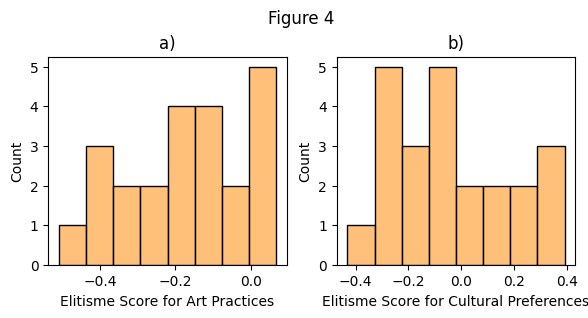

In [107]:
fig4, ax4 = plt.subplots(1, 2)
plt.suptitle("Figure 4")

fig4.set_figheight(3)
fig4.set_figwidth(6)
fig4.tight_layout(w_pad=0.5, h_pad=1.5)

sns.histplot(x=df["art"], bins=8, ax=ax4[0], color="#FFAC4C")
ax4[0].set_xlabel("Elitisme Score for Art Practices")
ax4[0].set_title('a)')

sns.histplot(x=df["culture"], bins=8, ax=ax4[1], color="#FFAC4C")
ax4[1].set_xlabel("Elitisme Score for Cultural Preferences")
ax4[1].set_title('b)')


## 5. Data Modelling

In [108]:
model = smf.ols(formula = 'Q("culture") ~ Q("Q14") + Q("Q10") + Q("Parents") + Q("Q13")', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Q("culture")   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                 -0.153
Method:                 Least Squares   F-statistic:                    0.3367
Date:                Wed, 19 Jun 2024   Prob (F-statistic):              0.849
Time:                        16:39:38   Log-Likelihood:                 2.5800
No. Observations:                  21   AIC:                             4.840
Df Residuals:                      16   BIC:                             10.06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.2433      0.232     -1.049      0.310      -0.735       0.248
Q("Q14")         0.0481      0.058      0.823      0.423      -0.076       0.172
Q("Q10")         0.0338      0.069      0.489      0.631      -0.113       0.180
Q("Parents")    -0.0067      0.046     -0.146      0.885      -0.104       0.090
Q("Q13")        -0.0049      0.105     -0.047      0.963      -0.228       0.218
==============================================================================
Omnibus:                        0.775   Durbin-Watson:                   1.349
Prob(Omnibus):                  0.679   Jarque-Bera (JB):                0.744
Skew:                           0.387   Prob(JB):                        0.689
Kurtosis:                       2.499   Cond. No.                         26.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
model = smf.ols(formula = 'Q("art") ~ Q("Q14") + Q("Q10") * Q("Q17") + Q("Parents") + Q("Q13")', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Q("art")   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                 -0.080
Method:                 Least Squares   F-statistic:                    0.7525
Date:                Wed, 19 Jun 2024   Prob (F-statistic):              0.618
Time:                        16:39:38   Log-Likelihood:                 15.017
No. Observations:                  21   AIC:                            -16.03
Df Residuals:                      14   BIC:                            -8.723
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.3504      0.938     -1.440      0.172      -3.362       0.661
Q("Q14")              0.0071      0.038      0.184      0.857      -0.075       0.089
Q("Q10")              0.5825      0.365      1.596      0.133      -0.200       1.365
Q("Q17")              0.2931      0.193      1.515      0.152      -0.122       0.708
Q("Q10"):Q("Q17")    -0.1348      0.080     -1.694      0.112      -0.306       0.036
Q("Parents")         -0.0297      0.028     -1.049      0.312      -0.090       0.031
Q("Q13")              0.0614      0.069      0.888      0.389      -0.087       0.210
==============================================================================
Omnibus:                        2.474   Durbin-Watson:                   2.291
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                1.635
Skew:                          -0.463   Prob(JB):                        0.441
Kurtosis:                       1.995   Cond. No.                         403.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""